In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
DIRECTORY= r"299aug-nor-macular"
CATAGORIES= ['macular-degeneration','normal']

In [3]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)
    
    
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        
        data.append([img_arr,label])

In [21]:
data

[[array([[[18, 37, 70],
          [19, 38, 71],
          [20, 41, 73],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0]],
  
         [[18, 37, 70],
          [20, 39, 72],
          [22, 43, 75],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0]],
  
         [[20, 39, 72],
          [22, 41, 74],
          [24, 45, 77],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0]],
  
         ...,
  
         [[26, 51, 91],
          [26, 51, 91],
          [25, 50, 90],
          ...,
          [38, 58, 75],
          [38, 58, 76],
          [38, 57, 78]],
  
         [[26, 51, 91],
          [26, 51, 91],
          [25, 50, 90],
          ...,
          [38, 58, 75],
          [38, 58, 75],
          [38, 58, 76]],
  
         [[26, 51, 91],
          [26, 51, 91],
          [25, 50, 90],
          ...,
          [38, 58, 75],
          [38, 58, 75],
          [38, 58, 76]]], dtype=u

In [4]:
random.shuffle(data)

In [6]:
x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)


In [7]:
X= np.array(x)
Y=np.array(y)

In [8]:
x

[array([[[ 81,  81, 127],
         [ 82,  82, 128],
         [ 82,  82, 128],
         ...,
         [130, 145, 238],
         [139, 154, 246],
         [144, 162, 251]],
 
        [[ 82,  82, 128],
         [ 82,  82, 128],
         [ 82,  82, 128],
         ...,
         [124, 138, 234],
         [133, 148, 241],
         [137, 155, 246]],
 
        [[ 84,  84, 130],
         [ 83,  83, 129],
         [ 82,  82, 128],
         ...,
         [112, 125, 223],
         [120, 134, 230],
         [124, 141, 234]],
 
        ...,
 
        [[ 82,  77, 108],
         [ 83,  78, 109],
         [ 83,  78, 109],
         ...,
         [ 79,  81, 145],
         [ 78,  81, 142],
         [ 77,  81, 140]],
 
        [[ 82,  77, 108],
         [ 83,  78, 109],
         [ 83,  78, 109],
         ...,
         [ 80,  82, 147],
         [ 79,  81, 145],
         [ 78,  81, 142]],
 
        [[ 83,  77, 108],
         [ 84,  78, 109],
         [ 84,  78, 109],
         ...,
         [ 81,  83, 148],
  

In [9]:
X=X/255

In [10]:
X

array([[[[0.31764706, 0.31764706, 0.49803922],
         [0.32156863, 0.32156863, 0.50196078],
         [0.32156863, 0.32156863, 0.50196078],
         ...,
         [0.50980392, 0.56862745, 0.93333333],
         [0.54509804, 0.60392157, 0.96470588],
         [0.56470588, 0.63529412, 0.98431373]],

        [[0.32156863, 0.32156863, 0.50196078],
         [0.32156863, 0.32156863, 0.50196078],
         [0.32156863, 0.32156863, 0.50196078],
         ...,
         [0.48627451, 0.54117647, 0.91764706],
         [0.52156863, 0.58039216, 0.94509804],
         [0.5372549 , 0.60784314, 0.96470588]],

        [[0.32941176, 0.32941176, 0.50980392],
         [0.3254902 , 0.3254902 , 0.50588235],
         [0.32156863, 0.32156863, 0.50196078],
         ...,
         [0.43921569, 0.49019608, 0.8745098 ],
         [0.47058824, 0.5254902 , 0.90196078],
         [0.48627451, 0.55294118, 0.91764706]],

        ...,

        [[0.32156863, 0.30196078, 0.42352941],
         [0.3254902 , 0.30588235, 0.42745098]

In [11]:
X.shape

(8000, 299, 299, 3)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [13]:
model=Sequential()
model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(2,activation='softmax'))

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 39200)             0

In [16]:
history = model.fit(X,Y,epochs=50,validation_split=0.1)

Epoch 1/50
225/225 [==============================] - 403s 2s/step - loss: 0.4035 - accuracy: 0.8174 - val_loss: 0.3557 - val_accuracy: 0.8537
Epoch 2/50
225/225 [==============================] - 367s 2s/step - loss: 0.3220 - accuracy: 0.8714 - val_loss: 0.3163 - val_accuracy: 0.8763
Epoch 3/50
225/225 [==============================] - 370s 2s/step - loss: 0.3138 - accuracy: 0.8757 - val_loss: 0.3185 - val_accuracy: 0.8775
Epoch 4/50
225/225 [==============================] - 364s 2s/step - loss: 0.3027 - accuracy: 0.8810 - val_loss: 0.2945 - val_accuracy: 0.8825
Epoch 5/50
225/225 [==============================] - 365s 2s/step - loss: 0.2867 - accuracy: 0.8856 - val_loss: 0.3034 - val_accuracy: 0.8825
Epoch 6/50
225/225 [==============================] - 362s 2s/step - loss: 0.2838 - accuracy: 0.8888 - val_loss: 0.3098 - val_accuracy: 0.8737
Epoch 7/50
225/225 [==============================] - 359s 2s/step - loss: 0.2711 - accuracy: 0.8907 - val_loss: 0.3247 - val_accuracy: 0.8775

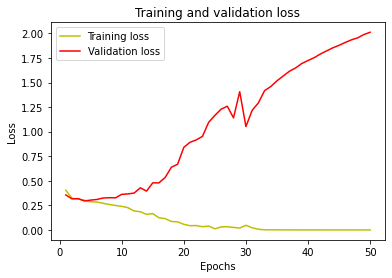

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

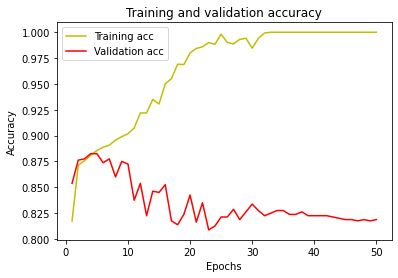

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
model.save_weights('models/model1.h5')